<a href="https://colab.research.google.com/github/MirzaDanyalBaig/ML_OEL_PhonEzy/blob/master/ML_OEL_PhonEzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Smartphone Prices Recommendation System

A solution for user's problems regarding the concern that whether the smartphones they've selected is within the range of optimal prices or not? PhonEzy let user provide some information regarding the phone of their choice and recommend them the optimal price for it.

# Contributors:
1.   Muhammad Faizan Khan (CS-21070)
2.   Mirza Danyal Baig (CS-21076)
3.   Aneeq Akhtar (CS-21101)



# Importing Packages

In [1]:
# Importing required libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [2]:
# Importing dataset
df = pd.read_csv('smartphonesDataset.csv')

In [3]:
# Show the dataset
df

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00
...,...,...,...,...,...,...,...,...
1811,Xiaomi Redmi Note 8 4/64GB Azul Libre,Xiaomi,Redmi Note 8,4.0,64.0,Blue,Yes,249.01
1812,Xiaomi Redmi Note 8T 4/128GB Azul Estelar Libre,Xiaomi,Redmi Note 8T,4.0,128.0,Blue,Yes,200.00
1813,Xiaomi Redmi Note 9 4/128GB Blanco Libre,Xiaomi,Redmi Note 9,4.0,128.0,White,Yes,269.00
1814,Xiaomi Redmi Note 9S 4/64GB Dual SIM Gris Libre,Xiaomi,Note 9S,4.0,64.0,Gray,Yes,211.00


# Data Cleaning

* ## Handling Missing Values

In [4]:
# Checking for missing values in dataset
df.isnull().sum()

# Missing values are present in the dataset in RAM and Storage columns

Smartphone       0
Brand            0
Model            0
RAM            483
Storage         25
Color            0
Free             0
Final Price      0
dtype: int64

There are several ways to fill missing values of the dataset including:
*   Imputation: Removal of rows with missing data.
*   Mode method: Take mode of data to fill missing records. Useful in filling missing continuous data values.
*   Mean method: Take mean of data to fill missing records. Useful in filling missing discrete data values.

Since RAM and storage columns are discrete numeric columns, thus we will fill them with mode technique.

In [5]:
# Filling missing values of RAM and Storage columns with mode of their respective data
df.fillna({'RAM': df['RAM'].mode()[0]} , inplace = True)
df.fillna({'Storage': df['Storage'].mode()[0]} , inplace = True)

In [6]:
# Checking for missing values again
df.isnull().sum()

Smartphone     0
Brand          0
Model          0
RAM            0
Storage        0
Color          0
Free           0
Final Price    0
dtype: int64

* ## Handling Duplicate Rows

Since duplication of records can lead to overfitting of data in model, thus we will remove it.

In [7]:
# Checking for duplicate rows
df.duplicated().sum()

# No duplicates rows are found in dataset

0

# Exploratory Data Analysis (EDA)

Now we will perform Exploratory Data Analysis (EDA) on dataset to gain insight regarding different patterns in data and compare different relationships between features of dataset.

In [8]:
# Show the shape of dataset

df.shape

(1816, 8)

In [9]:
# Show initial 5 rows of the dataset
df.head()

,Smartphone,Brand,Model,RAM,Storage,Color,Free,Final Price
0,Realme C55 8/256GB Sunshower Libre,Realme,C55,8.0,256.0,Yellow,Yes,231.60
1,Samsung Galaxy M23 5G 4/128GB Azul Libre,Samsung,Galaxy M23,4.0,128.0,Blue,Yes,279.00
2,Motorola Moto G13 4/128GB Azul Lavanda Libre,Motorola,Moto G13,4.0,128.0,Blue,Yes,179.01
3,Xiaomi Redmi Note 11S 6/128GB Gris Libre,Xiaomi,Redmi Note 11S,6.0,128.0,Gray,Yes,279.99
4,Nothing Phone (2) 12/512GB Blanco Libre,Nothing,Phone (2),12.0,512.0,White,Yes,799.00


* ## Summary of Dataset

In [10]:
# Show information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1816 entries, 0 to 1815
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Smartphone   1816 non-null   object 
 1   Brand        1816 non-null   object 
 2   Model        1816 non-null   object 
 3   RAM          1816 non-null   float64
 4   Storage      1816 non-null   float64
 5   Color        1816 non-null   object 
 6   Free         1816 non-null   object 
 7   Final Price  1816 non-null   float64
dtypes: float64(3), object(5)
memory usage: 113.6+ KB


Now we will show the statistical data summary of dataset.

In [11]:
# Show summary of the dataset
df.describe()

,RAM,Storage,Final Price
count,1816.000000,1816.000000,1816.000000
mean,6.503304,162.175110,492.175573
std,2.456899,138.507038,398.606183
min,1.000000,2.000000,60.460000
25%,4.000000,64.000000,200.990000
50%,8.000000,128.000000,349.990000
75%,8.000000,256.000000,652.717500
max,12.000000,1000.000000,2271.280000


* ## Seperating Categorical and Numeric Columns

Now we will separate the categorical and numeric coulmns of dataset to perform the respective type of data preprocessing correspondingly.

In [12]:
# For categorical columns
categorical_columns = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical_columns)))
print('The categorical variables are :\n\n', categorical_columns)

There are 5 categorical variables

The categorical variables are :

 ['Smartphone', 'Brand', 'Model', 'Color', 'Free']


In [13]:
# For numeric columns
numerical_columns = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical_columns)))
print('The numerical variables are :', numerical_columns)

There are 3 numerical variables

The numerical variables are : ['RAM', 'Storage', 'Final Price']


* ## Unique Values of Columns

Now we will represent the unique values of each column of dataset to determine whether the columns data has continuous or discrete data.

This will later help us during feature engineering.

1. ### For Smartphone Column

In [14]:
# Checking the unique values in Smartphone column.
print("Unique values in 'Smartphone' Column:")
print(df["Smartphone"].unique())

# Also printing its count.
print("\nCount of unique values in 'Smartphone' Column:")
df["Smartphone"].nunique()

Unique values in 'Smartphone' Column:
['Realme C55 8/256GB Sunshower Libre'
 'Samsung Galaxy M23 5G 4/128GB Azul Libre'
 'Motorola Moto G13 4/128GB Azul Lavanda Libre' ...
 'Xiaomi Redmi Note 9 4/128GB Blanco Libre'
 'Xiaomi Redmi Note 9S 4/64GB Dual SIM Gris Libre'
 'Xiaomi Redmi Note 9S 6/128GB Dual SIM Gris Libre']

Count of unique values in 'Smartphone' Column:


1816

Since the data in 'Smartphone' column has totally unique continuous categorical data, thus it will be dropped in feature engineering as it has no pattern for model to recognize.

2. ### Brand Column:

In [15]:
# Checking the unique values in Brand column.
print("Unique values in 'Brand' Column:")
print(df["Brand"].unique())

# Also printing its count.
print("\nCount of unique values in 'Brand' Column:")
df["Brand"].nunique()

Unique values in 'Brand' Column:
['Realme' 'Samsung' 'Motorola' 'Xiaomi' 'Nothing' 'POCO' 'Apple' 'OPPO'
 'Alcatel' 'Vivo' 'ZTE' 'OnePlus' 'TCL' 'CAT' 'SPC' 'Cubot' 'Google'
 'Ulefone' 'Nokia' 'Honor' 'Huawei' 'Sony' 'Hammer' 'Qubo' 'Blackview'
 'Asus' 'Microsoft' 'BQ' 'Crosscall' 'Doro' 'Fairphone' 'Funker' 'Gigaset'
 'LG' 'Maxcom' 'Swissvoice' 'Lenovo']

Count of unique values in 'Brand' Column:


37

3. ### Model Column

In [16]:
# Checking the unique values in Brand column.
print("Unique values in 'Brand' Column:")
print(df["Brand"].unique())

# Also printing its count.
print("\nCount of unique values in 'Brand' Column:")
df["Brand"].nunique()

Unique values in 'Brand' Column:
['Realme' 'Samsung' 'Motorola' 'Xiaomi' 'Nothing' 'POCO' 'Apple' 'OPPO'
 'Alcatel' 'Vivo' 'ZTE' 'OnePlus' 'TCL' 'CAT' 'SPC' 'Cubot' 'Google'
 'Ulefone' 'Nokia' 'Honor' 'Huawei' 'Sony' 'Hammer' 'Qubo' 'Blackview'
 'Asus' 'Microsoft' 'BQ' 'Crosscall' 'Doro' 'Fairphone' 'Funker' 'Gigaset'
 'LG' 'Maxcom' 'Swissvoice' 'Lenovo']

Count of unique values in 'Brand' Column:


37

4. ### RAM Column

In [32]:
# Checking the unique values in RAM column.
print("Unique values in 'Brand' Column:")
print(df["RAM"].unique())

# Also printing its count.
print("\nCount of unique values in 'Brand' Column:")
df["RAM"].nunique()

Unique values in 'Brand' Column:
[ 8.  4.  6. 12.  3.  2.  1.]

Count of unique values in 'Brand' Column:


7

5. ### Storage Column

In [33]:
# Checking the unique values in Storage column.
print("Unique values in 'Brand' Column:")
print(df["Storage"].unique())

# Also printing its count.
print("\nCount of unique values in 'Brand' Column:")
df["Storage"].nunique()

Unique values in 'Brand' Column:
[ 256.  128.  512.   64.   32.   16.    2. 1000.    4.   12.    3.    8.]

Count of unique values in 'Brand' Column:


12

6. ### Color Column

In [34]:
# Checking the unique values in Color column.
print("Unique values in 'Brand' Column:")
print(df["Color"].unique())

# Also printing its count.
print("\nCount of unique values in 'Brand' Column:")
df["Color"].nunique()

Unique values in 'Brand' Column:
['Yellow' 'Blue' 'Gray' 'White' 'Black' 'Green' 'Silver' 'Gold' 'Brown'
 'Orange' 'Purple' 'Pink' 'Red' 'Turquoise' 'Rainbow' 'Bronze' 'Crystal']

Count of unique values in 'Brand' Column:


17

7. ### Free Column

In [35]:
# Checking the unique values in Free column.
print("Unique values in 'Brand' Column:")
print(df["Free"].unique())

# Also printing its count.
print("\nCount of unique values in 'Brand' Column:")
df["Free"].nunique()

Unique values in 'Brand' Column:
['Yes' 'No']

Count of unique values in 'Brand' Column:


2

8. ### Price Column

In [37]:
# Checking the unique values in Price column.
print("Unique values in 'Brand' Column:")
print(df["Final Price"].unique())

# Also printing its count.
print("\nCount of unique values in 'Brand' Column:")
df["Final Price"].nunique()

Unique values in 'Brand' Column:
[231.6  279.   179.01 ... 229.92 271.   211.  ]

Count of unique values in 'Brand' Column:


1022

 ## Unique Value Count for Columns

Now we will calculate the count for individual unique value of every column in the data.

Smartphone column will be ignored since each value in column is unique value.

1. ### Brand Column:

In [17]:
# Show count of each RAM in the dataset
print(df['RAM'].value_counts())

RAM
8.0     864
4.0     380
6.0     259
3.0     112
12.0    109
2.0      88
1.0       4
Name: count, dtype: int64


In [18]:
# Show count of each brand in the dataset
print(df['Brand'].value_counts())

Brand
Samsung       458
Xiaomi        351
Apple         292
Realme        117
OPPO           92
POCO           67
Motorola       57
Huawei         57
TCL            36
Cubot          34
Ulefone        30
Blackview      27
Vivo           27
Honor          27
OnePlus        22
Hammer         21
ZTE            17
Nokia          13
SPC            11
Google          9
Nothing         9
Alcatel         7
Crosscall       7
CAT             6
Gigaset         3
Qubo            3
Asus            3
Doro            3
Sony            2
Swissvoice      1
Maxcom          1
LG              1
BQ              1
Funker          1
Fairphone       1
Microsoft       1
Lenovo          1
Name: count, dtype: int64


In [19]:
# Show count of each Storage in the dataset
print(df['Storage'].value_counts())

Storage
128.0     757
256.0     412
64.0      332
32.0      166
512.0      94
16.0       24
1000.0     17
4.0         6
8.0         3
2.0         2
3.0         2
12.0        1
Name: count, dtype: int64


In [20]:
# Visualizing 'Brand' feature's frequency distribution
# Count the occurrences of each Brand category
count = df["Brand"].value_counts()
print(count)

Brand
Samsung       458
Xiaomi        351
Apple         292
Realme        117
OPPO           92
POCO           67
Motorola       57
Huawei         57
TCL            36
Cubot          34
Ulefone        30
Blackview      27
Vivo           27
Honor          27
OnePlus        22
Hammer         21
ZTE            17
Nokia          13
SPC            11
Google          9
Nothing         9
Alcatel         7
Crosscall       7
CAT             6
Gigaset         3
Qubo            3
Asus            3
Doro            3
Sony            2
Swissvoice      1
Maxcom          1
LG              1
BQ              1
Funker          1
Fairphone       1
Microsoft       1
Lenovo          1
Name: count, dtype: int64


In [21]:
# Calculate percentages of 'Brand' feature values
percentage = (count/ count.sum()) * 100

<ipython-input-22-678951879027>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=percentage.index, y=percentage, palette="deep")


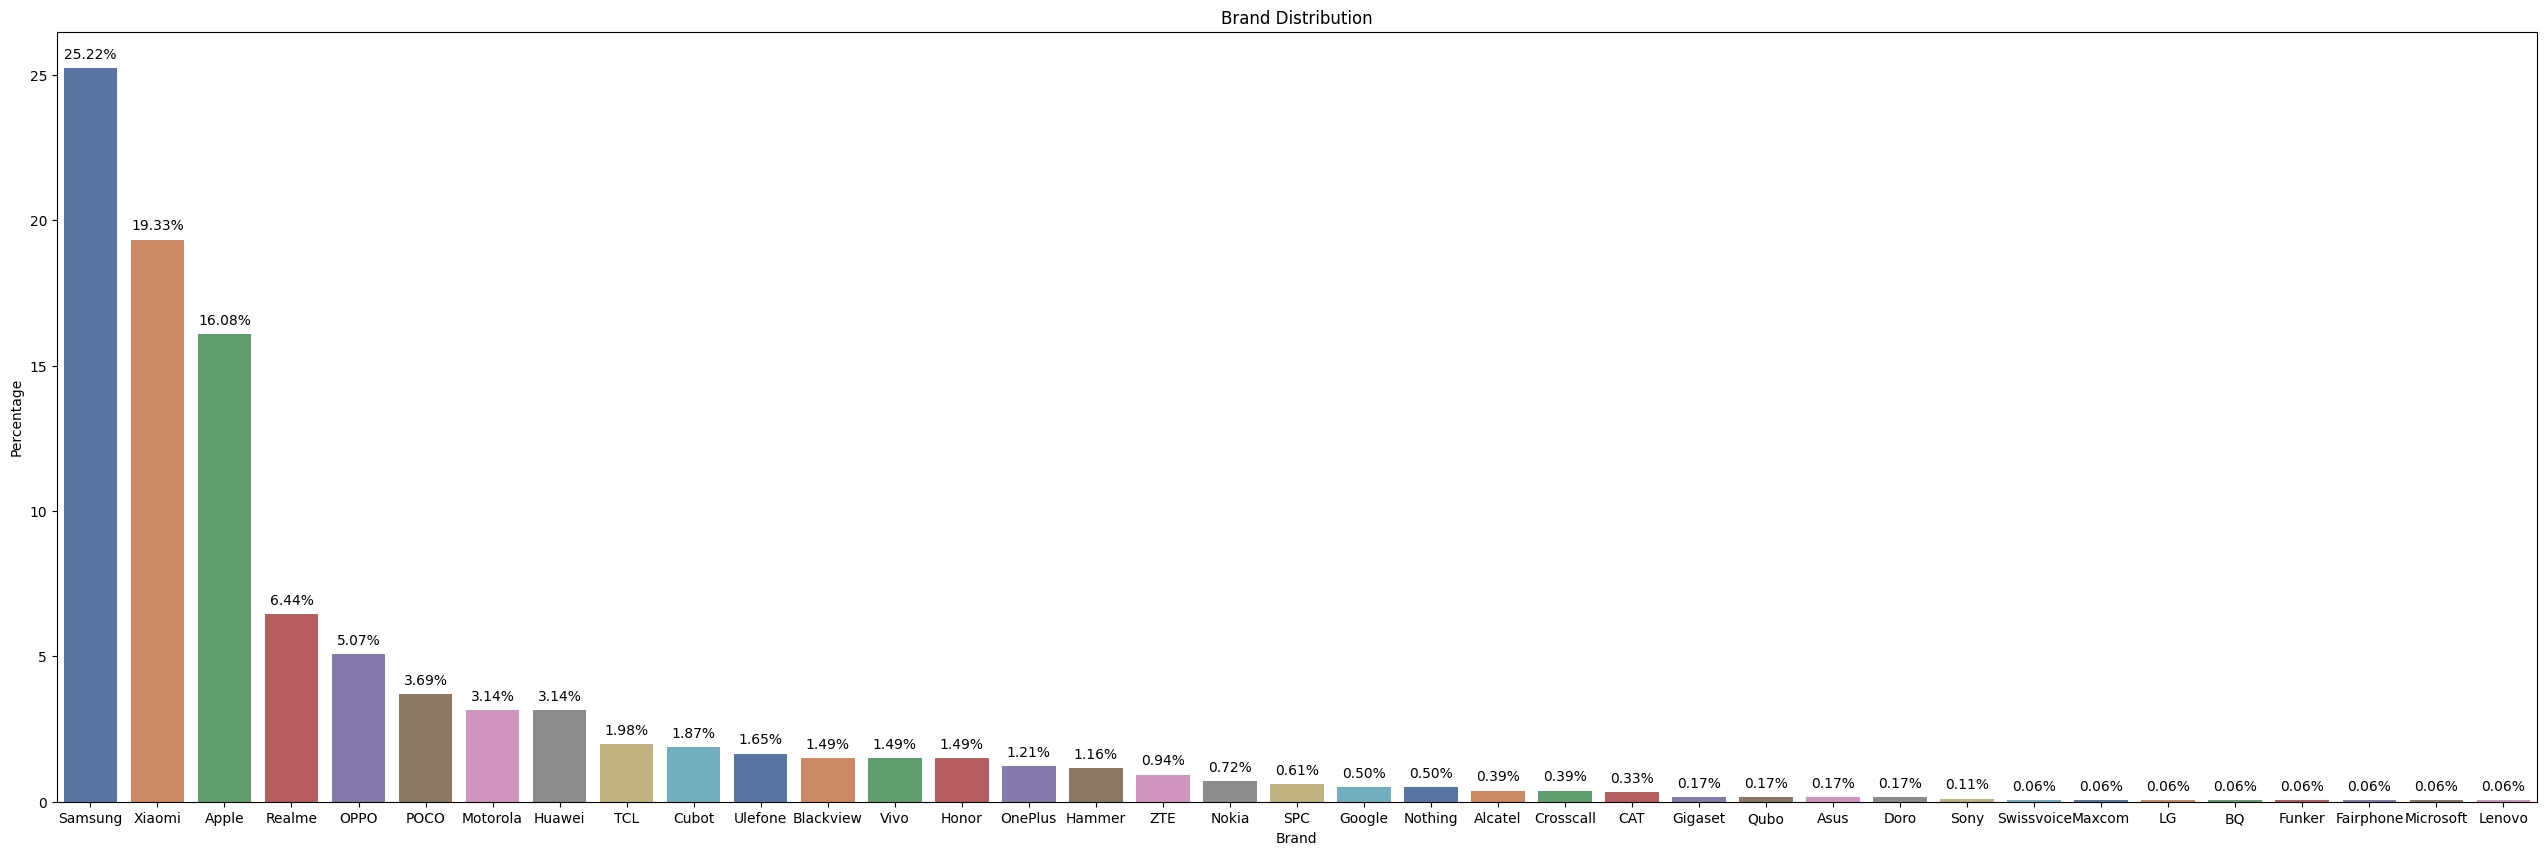

In [22]:
# Create the vertical bar plot of 'Brand' values distribution
plt.figure(figsize=(32, 10))
barplot = sns.barplot(x=percentage.index, y=percentage, palette="deep")
# Annotate each bar with the percentage value
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}%',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 10),
                     textcoords='offset points')
# Set the labels and title
plt.title("Brand Distribution")
plt.xlabel("Brand")
plt.ylabel("Percentage")
plt.show()

In [23]:
# Visualizing 'RAM' feature's frequency distribution
# Count the occurrences of each RAM category
count = df["RAM"].value_counts()
print(count)

RAM
8.0     864
4.0     380
6.0     259
3.0     112
12.0    109
2.0      88
1.0       4
Name: count, dtype: int64


In [24]:
# Calculate percentages of 'RAM' feature values
percentage = (count / count.sum()) * 100

<ipython-input-25-ba2c15f4d476>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot=sns.barplot(x=percentage.index, y=percentage, palette='deep')


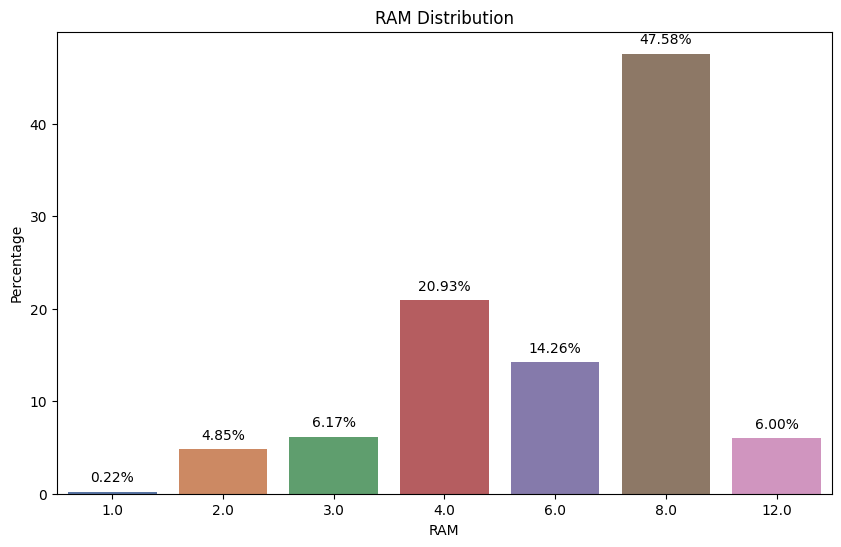

In [25]:
# Create the vertical bar plot of 'RAM' values distribution
plt.figure(figsize=(10, 6))
barplot=sns.barplot(x=percentage.index, y=percentage, palette='deep')
# Annotate each bar with the percentage value
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}%',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 10),
                     textcoords='offset points')
# Set the labels and title
plt.title("RAM Distribution")
plt.xlabel("RAM")
plt.ylabel("Percentage")
plt.show()

In [26]:
# Visualizing 'Storage' feature's frequency distribution
# Count the occurrences of each Storage category
count=df["Storage"].value_counts()
print(count)

Storage
128.0     757
256.0     412
64.0      332
32.0      166
512.0      94
16.0       24
1000.0     17
4.0         6
8.0         3
2.0         2
3.0         2
12.0        1
Name: count, dtype: int64


In [27]:
# Calculate percentages of 'Storage' feature values
percentage = (count / count.sum()) * 100

<ipython-input-28-75a0e9c79145>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot=sns.barplot(x=percentage.index, y=percentage, palette='muted')


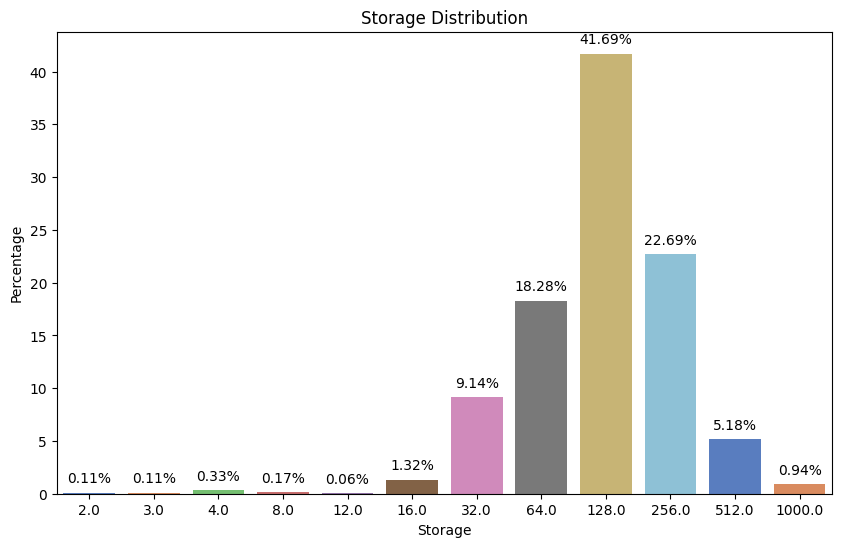

In [28]:
# Create the vertical bar plot of 'Storage' values distribution
plt.figure(figsize=(10, 6))
barplot=sns.barplot(x=percentage.index, y=percentage, palette='muted')
# Annotate each bar with the percentage value
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}%',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 10),
                     textcoords='offset points')
# Set the labels and title
plt.title("Storage Distribution")
plt.xlabel("Storage")
plt.ylabel("Percentage")
plt.show()

In [29]:
# Visualizing 'Color' feature's frequency distribution
# Count the occurrences of each Color category
count = df["Color"].value_counts()
print(count)

Color
Black        537
Blue         339
Gray         196
Green        180
White        170
Silver        86
Purple        80
Gold          68
Red           48
Pink          41
Orange        30
Yellow        24
Turquoise      5
Brown          4
Crystal        4
Bronze         3
Rainbow        1
Name: count, dtype: int64


In [30]:
# Calculate percentages of 'Color' feature values
percentage = (count/ count.sum()) * 100

<ipython-input-31-a8781eee3faf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=percentage.index, y=percentage, palette="deep")


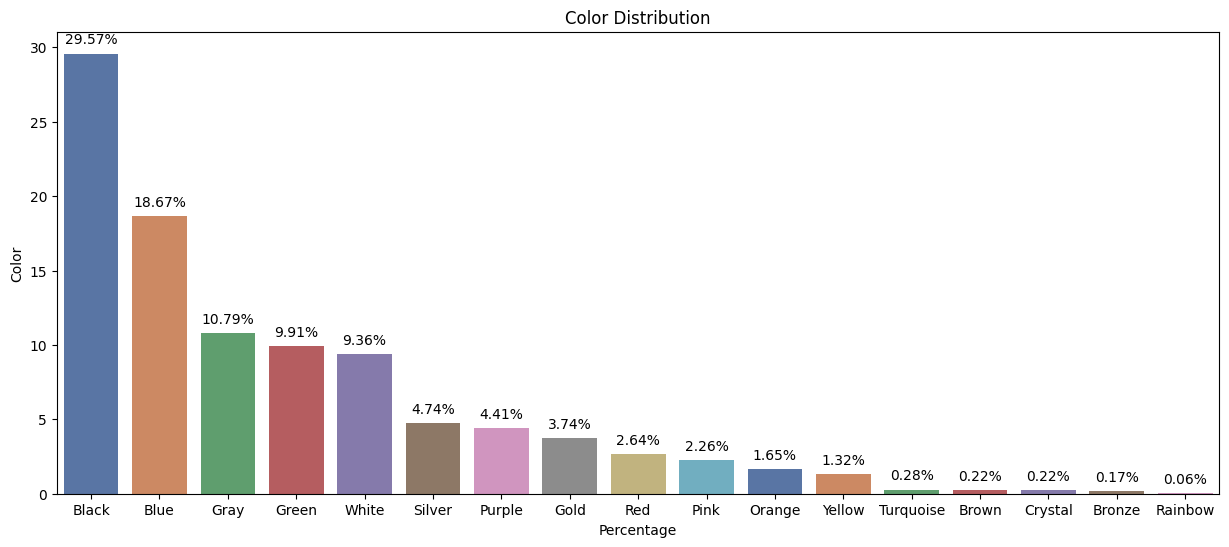

In [31]:
# Create the vertical bar plot of 'Color' values distribution
plt.figure(figsize=(15, 6))
barplot = sns.barplot(x=percentage.index, y=percentage, palette="deep")
# Annotate each bar with the percentage value
for p in barplot.patches:
    barplot.annotate(f'{p.get_height():.2f}%',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 10),
                     textcoords='offset points')
# Set the labels and title
plt.xlabel('Percentage')
plt.ylabel("Color")
plt.title('Color Distribution')
plt.show()

# Feature Engineering

* ## Distribution of Dataset into Features and Target Variables

* ## Encoding of Categorical Features

* ## Numerical Feature Scaling (Normalization)

# Model Building

*   ## Linear Regression

*   ## Decision Tree Regression

* ## K-Nearest Neighbour Regression

# Model Evaluation

* ## Linear Regression

* ## Decision Tree Regression

* ## K-Nearest Neighbour Regression

# Conclusion